In [ ]:
#Unemployment Analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
#Load data
df = pd.read_csv("C:/Users/Bhosle/OneDrive/Documents/OJT_work/codealpha/Unemployment_Rate_upto_11_2020.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [14]:
#data cleaning
# Check for missing values
print(df.isnull().sum())

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)

# Rename columns for convenience
df.rename(columns={
    'Region': 'State',
    'Estimated Unemployment Rate (%)': 'Unemployment_Rate'
}, inplace=True)

# Check data types
print(df.dtypes)


Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Region.1                                   0
longitude                                  0
latitude                                   0
dtype: int64
State                                              object
Date                                       datetime64[ns]
Frequency                                          object
Unemployment_Rate                                 float64
Estimated Employed                                  int64
Estimated Labour Participation Rate (%)           float64
Region.1                                           object
longitude                                         float64
latitude                                          float64
dtype: object


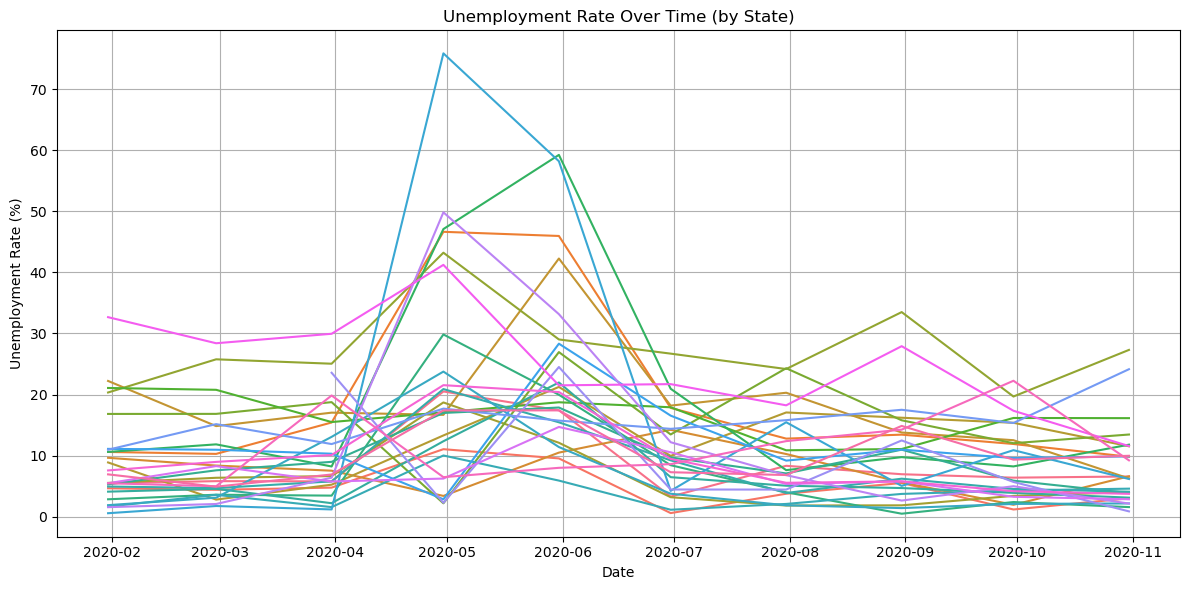

In [15]:
#Exploratory data analysis
#Unemployment trend over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Unemployment_Rate', hue='State', legend=False)
plt.title('Unemployment Rate Over Time (by State)')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Bhosle\AppData\Local\Temp\ipykernel_3556\502498300.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_state.values, y=avg_state.index, palette='viridis')


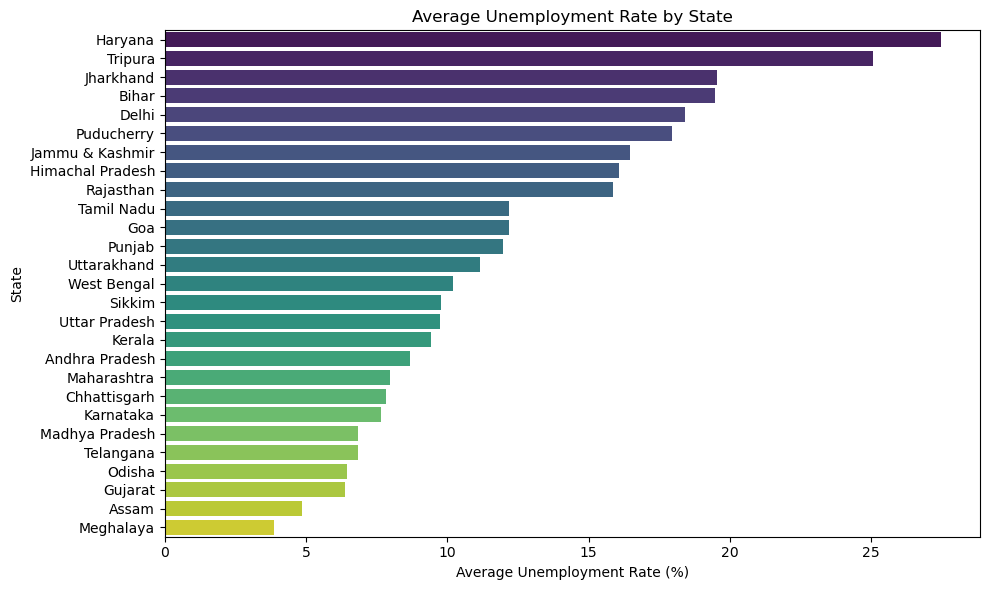

In [16]:
#Average Unemployment rate by state
avg_state = df.groupby('State')['Unemployment_Rate'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_state.values, y=avg_state.index, palette='viridis')
plt.title('Average Unemployment Rate by State')
plt.xlabel('Average Unemployment Rate (%)')
plt.ylabel('State')
plt.tight_layout()
plt.show()


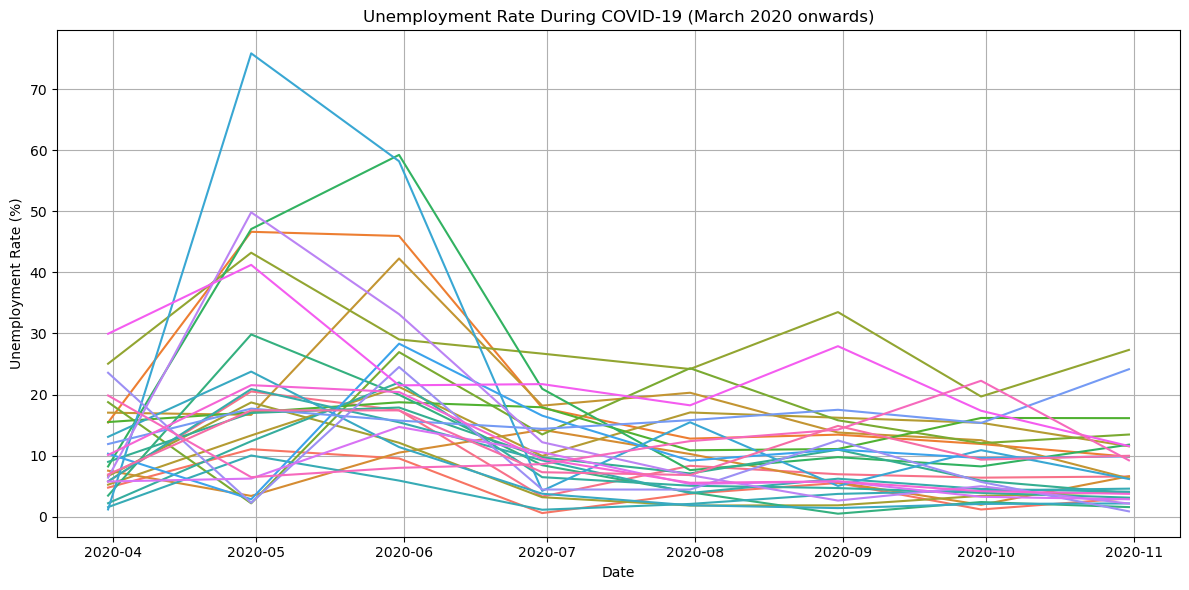

In [17]:
#Analyze covid impact (march 2020 onwards)
covid_df = df[df['Date'] >= '2020-03-01']

plt.figure(figsize=(12, 6))
sns.lineplot(data=covid_df, x='Date', y='Unemployment_Rate', hue='State', legend=False)
plt.title('Unemployment Rate During COVID-19 (March 2020 onwards)')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


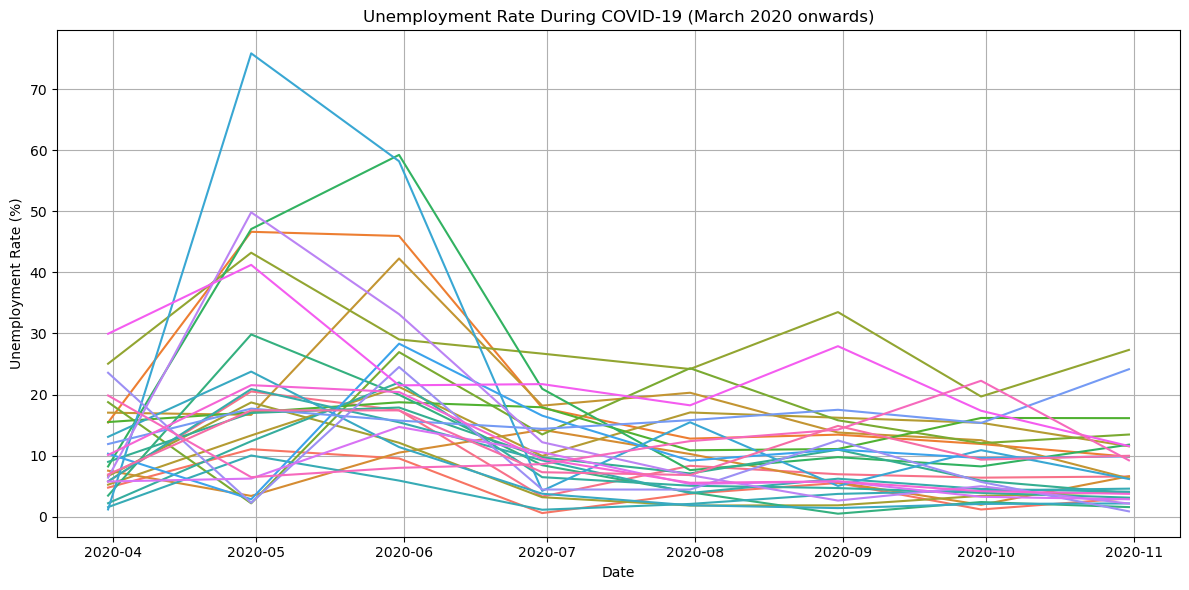

In [18]:
#Monthly seasonality pattern
covid_df = df[df['Date'] >= '2020-03-01']

plt.figure(figsize=(12, 6))
sns.lineplot(data=covid_df, x='Date', y='Unemployment_Rate', hue='State', legend=False)
plt.title('Unemployment Rate During COVID-19 (March 2020 onwards)')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [19]:
# Top 5 states with highest average unemployment
top_states = avg_state.head(5)

print("Top 5 States with Highest Average Unemployment:")
print(top_states)


Top 5 States with Highest Average Unemployment:
State
Haryana      27.477
Tripura      25.055
Jharkhand    19.539
Bihar        19.471
Delhi        18.414
Name: Unemployment_Rate, dtype: float64


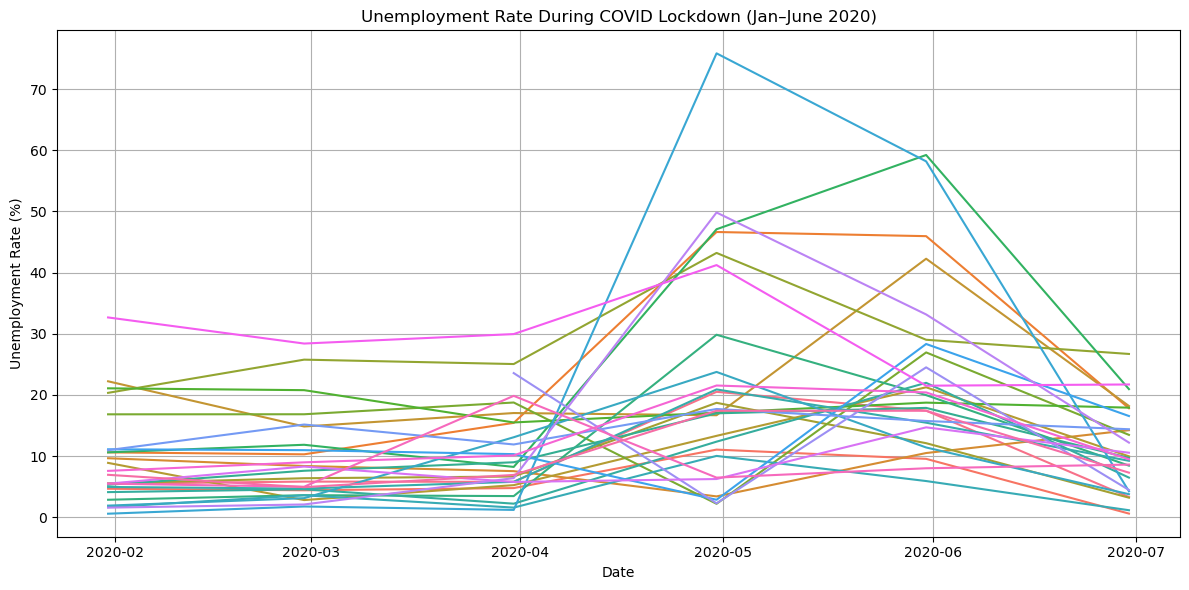

In [20]:
# Filter data from Jan to June 2020
lockdown_period = df[(df['Date'] >= '2020-01-01') & (df['Date'] <= '2020-06-30')]

plt.figure(figsize=(12, 6))
sns.lineplot(data=lockdown_period, x='Date', y='Unemployment_Rate', hue='State', legend=False)
plt.title('Unemployment Rate During COVID Lockdown (Jan–June 2020)')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()
